In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
# First I am reading into the park boundaries data set in geojson

In [3]:
parks = gpd.read_file('../data/Metro Parks Boundaries (GIS).geojson')
print(parks.crs)
parks.head( )

epsg:4326


acres                  name year_estab     common_nam status  \
0     69.86    Harpeth River Park       1988  Harpeth River   PARK   
1      9.88    Harpeth Knoll Park       1972  Harpeth Knoll   PARK   
2     17.14         Bellevue Park       1982    Red Caboose   PARK   
3    809.59       Bells Bend Park       2007     Bells Bend   PARK   
4  2168.792  Alvin G. Beaman Park       1996         Beaman   PARK   

                   address           lon          lat  \
0      7820 Coley Davis Rd   -86.9592214  36.07738249   
1  708 Goodpasture Terrace  -86.93815537  36.05942777   
2     656 Colice Jeanne Rd  -86.93354496  36.07159731   
3    4187 Old Hickory Blvd  -86.92646294  36.15016925   
4   5911 Old Hickory Blvd.  -86.91984207  36.26075833   

                                          descriptio  \
0  Harpeth River State Park has much historical a...   
1  Huge grassy field with playground, and shade s...   
2  Bellevue Park, known as Red Caboose Park, is p...   
3  Located in western Davidson County, this park ...   
4  Beaman Park provides education and awareness p...   

                                            geometry  
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...

In [4]:
type(parks)

geopandas.geodataframe.GeoDataFrame

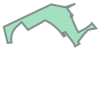

In [5]:
parks.loc[0, 'geometry']

In [6]:
print(parks.loc[0, 'geometry'])

MULTIPOLYGON (((-86.95546524763979 36.07930145579854, -86.95577768867267 36.0791390934377, -86.95554165522448 36.07881679726515, -86.95555002481612 36.07876336296327, -86.95547131924887 36.07872072961796, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.07839107173579, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.07829407526238, -86.95521421491281 36.07826638490727, -86.95520846364511 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.07815386881271, -86.95519898519579 36.07812557509128, -86.95519999833 36.07809727154806, -86.95520236476608 36.07806895638105, -86.9552057503346 36.07804090893737, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.07813012168268, -86.95500338104712 36.07803322156244, -86.9550

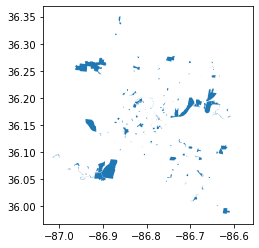

In [7]:
parks.plot();

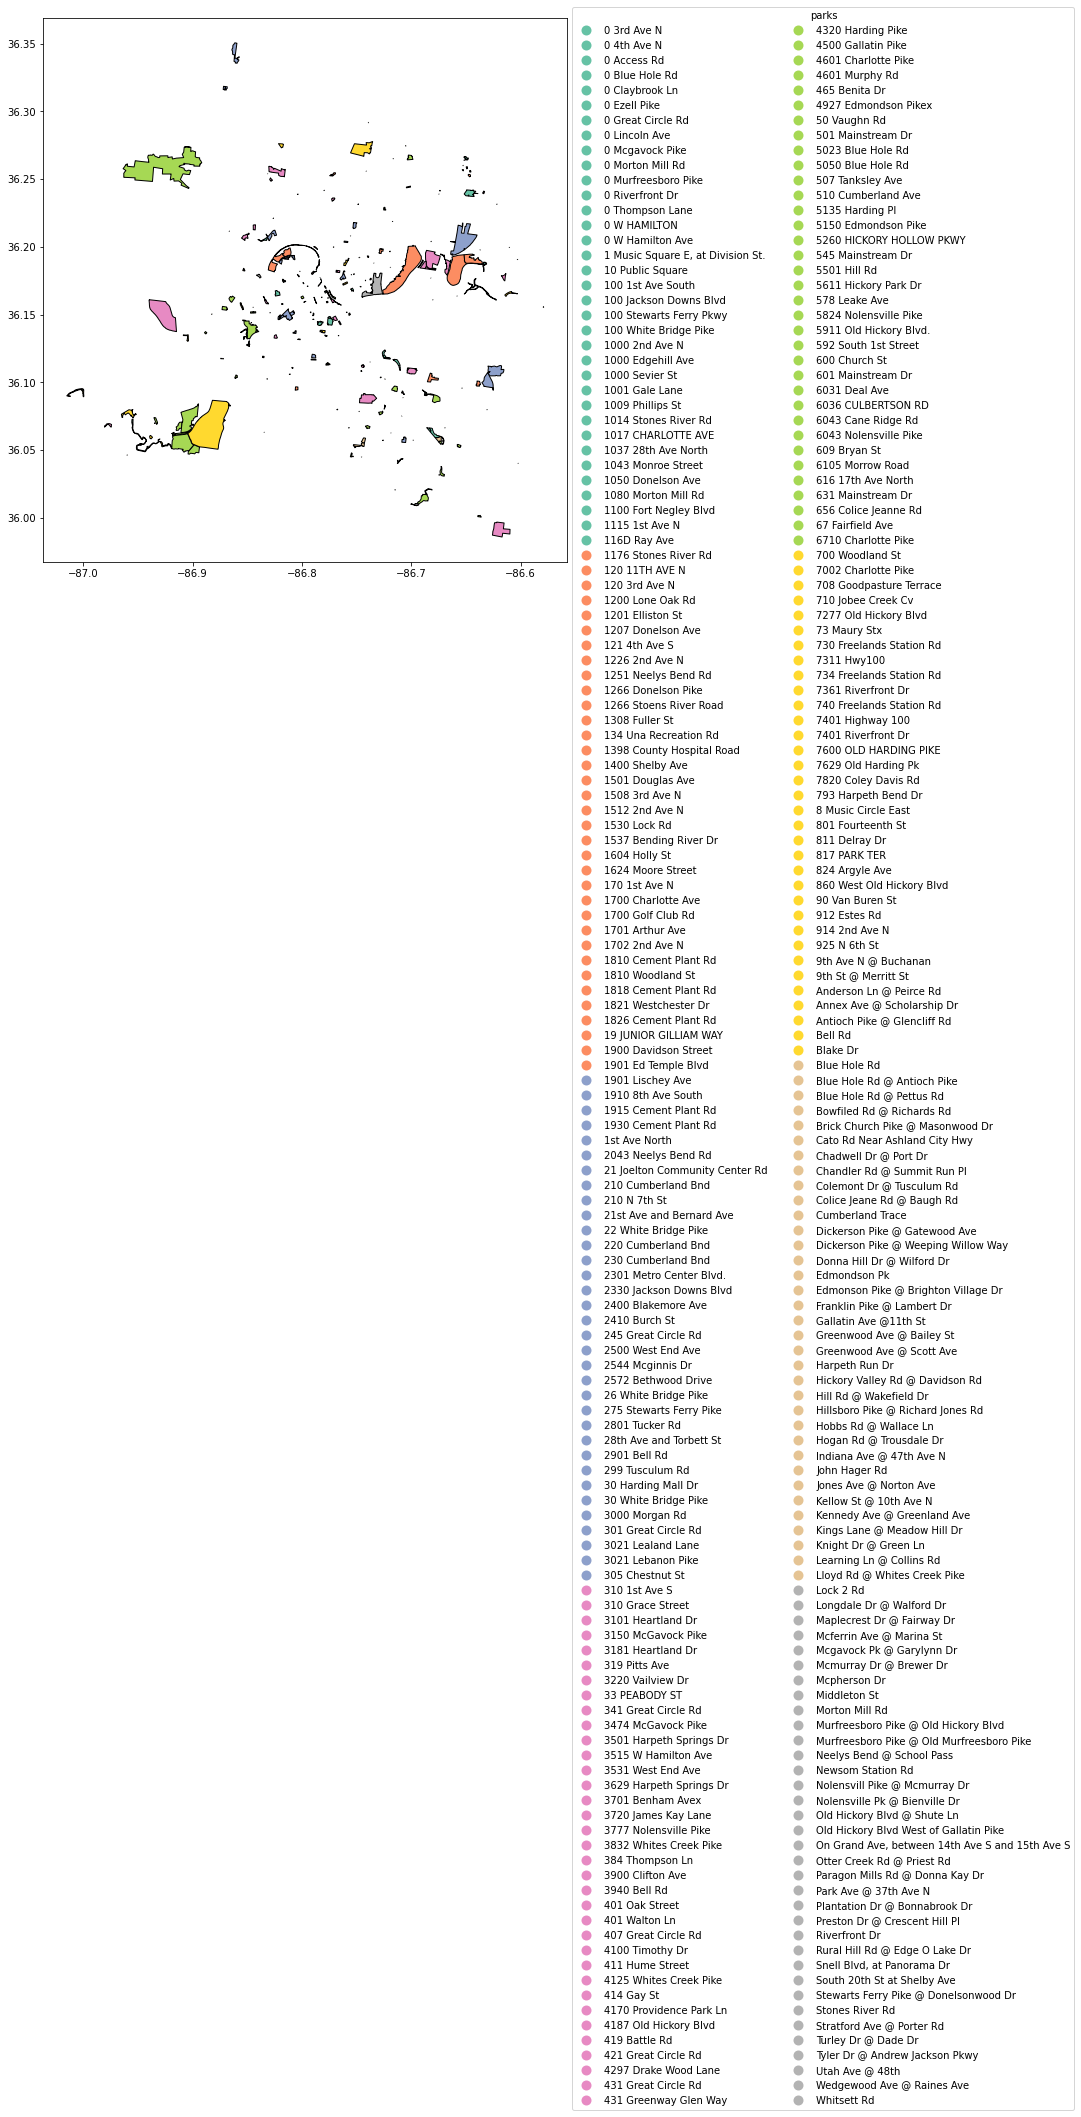

In [8]:
leg_kwds = {'title': 'parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'address', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [9]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   acres       287 non-null    object  
 1   name        183 non-null    object  
 2   year_estab  287 non-null    object  
 3   common_nam  287 non-null    object  
 4   status      287 non-null    object  
 5   address     283 non-null    object  
 6   lon         287 non-null    object  
 7   lat         287 non-null    object  
 8   descriptio  103 non-null    object  
 9   geometry    287 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 22.5+ KB


In [10]:
# Now I am reading into the water fountain dataset in csv

In [62]:
water_fountains = pd.read_csv('../data/WaterFountains_HydrationSystems.csv')

In [63]:
print(water_fountains.shape)

(73, 10)


In [13]:
water_fountains.head()

the_geom OBJECTID        LAT  \
0   POINT (-86.89425345576078 36.26250455840148)   45,921 -86.894253   
1   POINT (-86.90622747033689 36.06089914863129)   45,937 -86.906227   
2   POINT (-86.86727565917963 36.08310102493863)   45,964 -86.867276   
3   POINT (-86.8637899391243 36.161795831166906)   45,992 -86.863790   
4  POINT (-86.84589094125035 36.151393836128406)   46,012 -86.845891   

                                            NAME        LON  \
0                          Beaman Water Fountain  36.262505   
1             Edwin Nature Center Water Fountain  36.060899   
2  Percy Warner Belle Meade Gates Water Fountain  36.083101   
3                       West Park Water Fountain  36.161796   
4                   Richland Park Water Fountain  36.151394   

              Location Dog                    FeatType  Cnt ADA  
0                  NaN   Y  Fountain/Bottle filler/ADA    1   Y  
1  Restrooms Breezeway   N           Bottle Filler/ADA    1   Y  
2    Belle Meade Gates   Y                    ADA Bowl    1   Y  
3            Ballfield   N      Single with foot pedal    1   N  
4           Playground   N      Single with foot pedal    1   N

In [14]:
water_fountains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   the_geom  73 non-null     object 
 1   OBJECTID  73 non-null     object 
 2   LAT       73 non-null     float64
 3   NAME      73 non-null     object 
 4   LON       73 non-null     float64
 5   Location  65 non-null     object 
 6   Dog       73 non-null     object 
 7   FeatType  73 non-null     object 
 8   Cnt       73 non-null     int64  
 9   ADA       73 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.8+ KB


In [16]:
## Here I am adding the geometry column to get the geospacial Latitude and Longitude. 
# CAREFUL: in the dataset LAT and LON are reversed

In [65]:
water_fountains['geometry'] = water_fountains.apply(lambda x: Point((float(x.LAT), 
                                                         float(x.LON))), 
                                        axis=1)
water_fountains.head(3)

the_geom OBJECTID        LAT  \
0  POINT (-86.89425345576078 36.26250455840148)   45,921 -86.894253   
1  POINT (-86.90622747033689 36.06089914863129)   45,937 -86.906227   
2  POINT (-86.86727565917963 36.08310102493863)   45,964 -86.867276   

                                            NAME        LON  \
0                          Beaman Water Fountain  36.262505   
1             Edwin Nature Center Water Fountain  36.060899   
2  Percy Warner Belle Meade Gates Water Fountain  36.083101   

              Location Dog                    FeatType  Cnt ADA  \
0                  NaN   Y  Fountain/Bottle filler/ADA    1   Y   
1  Restrooms Breezeway   N           Bottle Filler/ADA    1   Y   
2    Belle Meade Gates   Y                    ADA Bowl    1   Y   

                           geometry  
0  POINT (-86.89425346 36.26250456)  
1  POINT (-86.90622747 36.06089915)  
2  POINT (-86.86727566 36.08310102)

In [66]:
water_fountains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   the_geom  73 non-null     object 
 1   OBJECTID  73 non-null     object 
 2   LAT       73 non-null     float64
 3   NAME      73 non-null     object 
 4   LON       73 non-null     float64
 5   Location  65 non-null     object 
 6   Dog       73 non-null     object 
 7   FeatType  73 non-null     object 
 8   Cnt       73 non-null     int64  
 9   ADA       73 non-null     object 
 10  geometry  73 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 6.4+ KB


In [67]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
water_fountains.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

In [69]:
# let's match the CRS and convert it into a geodataframe
water_fountains_geo = gpd.GeoDataFrame(water_fountains, 
                           crs = parks.crs, 
                           geometry = water_fountains['geometry'])

In [70]:
type(water_fountains_geo)

geopandas.geodataframe.GeoDataFrame

In [71]:
water_fountains_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
# now let's join

In [73]:
water_fountains_geo.head()

the_geom OBJECTID        LAT  \
0   POINT (-86.89425345576078 36.26250455840148)   45,921 -86.894253   
1   POINT (-86.90622747033689 36.06089914863129)   45,937 -86.906227   
2   POINT (-86.86727565917963 36.08310102493863)   45,964 -86.867276   
3   POINT (-86.8637899391243 36.161795831166906)   45,992 -86.863790   
4  POINT (-86.84589094125035 36.151393836128406)   46,012 -86.845891   

                                            NAME        LON  \
0                          Beaman Water Fountain  36.262505   
1             Edwin Nature Center Water Fountain  36.060899   
2  Percy Warner Belle Meade Gates Water Fountain  36.083101   
3                       West Park Water Fountain  36.161796   
4                   Richland Park Water Fountain  36.151394   

              Location Dog                    FeatType  Cnt ADA  \
0                  NaN   Y  Fountain/Bottle filler/ADA    1   Y   
1  Restrooms Breezeway   N           Bottle Filler/ADA    1   Y   
2    Belle Meade Gates   Y                    ADA Bowl    1   Y   
3            Ballfield   N      Single with foot pedal    1   N   
4           Playground   N      Single with foot pedal    1   N   

                     geometry  
0  POINT (-86.89425 36.26250)  
1  POINT (-86.90623 36.06090)  
2  POINT (-86.86728 36.08310)  
3  POINT (-86.86379 36.16180)  
4  POINT (-86.84589 36.15139)

In [74]:
water_fountains_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   the_geom  73 non-null     object  
 1   OBJECTID  73 non-null     object  
 2   LAT       73 non-null     float64 
 3   NAME      73 non-null     object  
 4   LON       73 non-null     float64 
 5   Location  65 non-null     object  
 6   Dog       73 non-null     object  
 7   FeatType  73 non-null     object  
 8   Cnt       73 non-null     int64   
 9   ADA       73 non-null     object  
 10  geometry  73 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(7)
memory usage: 6.4+ KB


<font color = 'red'> Here I am dropping some columns for water_fountains
    <font/>

In [75]:
water_fountains_geo = water_fountains_geo[['NAME', 'Location', 'Dog', 'FeatType', 'geometry']]
water_fountains_geo.head()

NAME             Location Dog  \
0                          Beaman Water Fountain                  NaN   Y   
1             Edwin Nature Center Water Fountain  Restrooms Breezeway   N   
2  Percy Warner Belle Meade Gates Water Fountain    Belle Meade Gates   Y   
3                       West Park Water Fountain            Ballfield   N   
4                   Richland Park Water Fountain           Playground   N   

                     FeatType                    geometry  
0  Fountain/Bottle filler/ADA  POINT (-86.89425 36.26250)  
1           Bottle Filler/ADA  POINT (-86.90623 36.06090)  
2                    ADA Bowl  POINT (-86.86728 36.08310)  
3      Single with foot pedal  POINT (-86.86379 36.16180)  
4      Single with foot pedal  POINT (-86.84589 36.15139)

In [76]:
parks.head()

name                                         descriptio  \
0    Harpeth River Park  Harpeth River State Park has much historical a...   
1    Harpeth Knoll Park  Huge grassy field with playground, and shade s...   
2         Bellevue Park  Bellevue Park, known as Red Caboose Park, is p...   
3       Bells Bend Park  Located in western Davidson County, this park ...   
4  Alvin G. Beaman Park  Beaman Park provides education and awareness p...   

                                            geometry  
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...

In [77]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        183 non-null    object  
 1   descriptio  103 non-null    object  
 2   geometry    287 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 6.9+ KB


<font color = 'red'> Here I am dropping some columns for parks
    <font/>

In [78]:
parks = parks[['name', 'descriptio', 'geometry']]
parks.head()

name                                         descriptio  \
0    Harpeth River Park  Harpeth River State Park has much historical a...   
1    Harpeth Knoll Park  Huge grassy field with playground, and shade s...   
2         Bellevue Park  Bellevue Park, known as Red Caboose Park, is p...   
3       Bells Bend Park  Located in western Davidson County, this park ...   
4  Alvin G. Beaman Park  Beaman Park provides education and awareness p...   

                                            geometry  
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...

In [79]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        183 non-null    object  
 1   descriptio  103 non-null    object  
 2   geometry    287 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 6.9+ KB


In [80]:
water_fountains_in_parks = gpd.sjoin(water_fountains_geo, parks, op = 'within')
water_fountains_in_parks.head()

NAME                 Location Dog  \
0                    Beaman Water Fountain                      NaN   Y   
1       Edwin Nature Center Water Fountain      Restrooms Breezeway   N   
29    Edwin Warner Dog Park Water Fountain                 Dog Park   Y   
30  Edwin Warner Concession Water Fountain         WNSL Concessions   N   
69                  Harpeth River Greenway  Butler Field Trail Head   Y   

                      FeatType                    geometry  index_right  \
0   Fountain/Bottle filler/ADA  POINT (-86.89425 36.26250)            4   
1            Bottle Filler/ADA  POINT (-86.90623 36.06090)            5   
29                    Dog Only  POINT (-86.90162 36.05196)            5   
30                Standard/ADA  POINT (-86.89817 36.04998)            5   
69  Standard/ADA/Bottle Filler  POINT (-86.91617 36.05133)            5   

                    name                                         descriptio  
0   Alvin G. Beaman Park  Beaman Park provides education and awareness p...  
1      Edwin Warner Park  Edwin Warner Park is a great, multi-recreation...  
29     Edwin Warner Park  Edwin Warner Park is a great, multi-recreation...  
30     Edwin Warner Park  Edwin Warner Park is a great, multi-recreation...  
69     Edwin Warner Park  Edwin Warner Park is a great, multi-recreation...

In [81]:
water_fountains_in_parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 61 entries, 0 to 68
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NAME         61 non-null     object  
 1   Location     60 non-null     object  
 2   Dog          61 non-null     object  
 3   FeatType     61 non-null     object  
 4   geometry     61 non-null     geometry
 5   index_right  61 non-null     int64   
 6   name         59 non-null     object  
 7   descriptio   53 non-null     object  
dtypes: geometry(1), int64(1), object(6)
memory usage: 4.3+ KB


In [82]:
water_fountains_in_parks['name'].value_counts()

Riverfront Park                5
Edwin Warner Park              4
Cedar Hill                     4
Cane Ridge Park                3
Shelby Park                    3
Shelby Bottoms Park            3
Fannie Mae Dees Park           3
McCabe Park                    2
Sevier Park                    2
Two Rivers Park                2
Elizabeth Park                 1
England                        1
Cleveland Park                 1
Parmer Park                    1
West Park                      1
Cumberland Park                1
Seven Oaks Park                1
Bordeaux Garden Park           1
Elmington Park                 1
Buena Vista Park               1
William Whitfield Park         1
Fort Negley                    1
City Cemetery                  1
Providence Park                1
Woodmont Park                  1
Centennial Park                1
E. N. Peeler Park              1
Hermitage Park                 1
Percy Warner Park              1
Ted Rhodes Park                1
Hadley Par

In [83]:
water_fountains_in_RiverfrontPark = water_fountains_in_parks.loc[water_fountains_in_parks['name'] == 'Riverfront Park']
water_fountains_in_RiverfrontPark.shape

(5, 8)

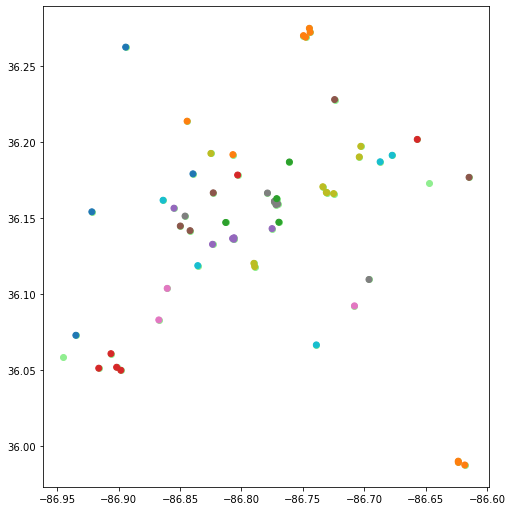

In [84]:
#fig, ax = matplotlib.subplots()
ax = water_fountains_in_parks.plot(figsize = (8, 10), color = 'lightgreen')
water_fountains_in_parks.plot( ax = ax, column = 'name');
plt.show();

In [85]:
water_fountains_in_RiverfrontPark.centroid

<ipython-input-85-3bcc91c06b9f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_fountains_in_RiverfrontPark.centroid


21    POINT (-86.77189 36.15899)
44    POINT (-86.77052 36.15935)
45    POINT (-86.77311 36.16105)
46    POINT (-86.77307 36.16093)
71    POINT (-86.77121 36.16014)
dtype: geometry

In [86]:
#find the center of the larger (more southern) polygon and look at it
center = water_fountains_in_RiverfrontPark.geometry.centroid[71]
print(center)

POINT (-86.77120997999999 36.16014227)


<ipython-input-86-9eb6a1bd1316>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = water_fountains_in_RiverfrontPark.geometry.centroid[71]
